# Projekt 2 
### P. Fijałkowski, M. Krzyziński, T. Nocoń

## Finalne modele, prezentacja rezultatów 

#### Import pakietów

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
online_shopping = pd.read_csv("online_shoppers_intention.csv")
data = online_shopping.copy() # robimy zmiany na tej ramce, a oryginału nie ruszamy

In [3]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


#### Zmiana wszystkich zmiennych na format liczbowy

Korzystając z wiedzy i kodu wygenerowanego na etapie drugim projektu, przeprowadzimy transformacje zbioru danych w celu umożliwienia modelowania i klasteryzacji. 


Konieczna jest zamiana wszystkich zmiennych na wartości liczbowe (ze względu na to, że algorytmy klasteryzujące opierają się na odległości między obserwacjami). Poniższy kod odpowiada za zakodowanie nazw miesięcy (kolumna `Month`), typu odwiedzającego stronę (`VisitorType`) i informacji o tym, czy dana sesja odbyła się w weekend (`Weekend`) oraz czy przyniosła dochód (`Revenue`). 

In [4]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
scaler = StandardScaler()

In [5]:
def make_all_features_numeric(data):
    # month
    months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 
    months_dict = {k: v+1 for v, k in enumerate(months)}
    data["Month"] = data["Month"].map(months_dict)
    
    # visitor type
    data["VisitorType"] = ordinal_encoder.fit_transform(data["VisitorType"].values.reshape(-1, 1))
    
    # weekend, revenue
    booleans = ['Weekend', 'Revenue']
    for boolean in booleans:
        data[boolean] = data[boolean].transform(lambda val: 1 if val else 0)
    return data

In [6]:
data = make_all_features_numeric(data)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2.0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2.0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2.0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2.0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,2.0,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,2.0,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,2.0,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,2.0,0,0


#### Transformacja logarytmiczna zmiennych

Z EDA i drugiego etapu wiemy, że dobrym krokiem była transformacja logarytmiczna o skośnych rozkładach. Zatem przeprowadzamy ją i w tym kroku. 

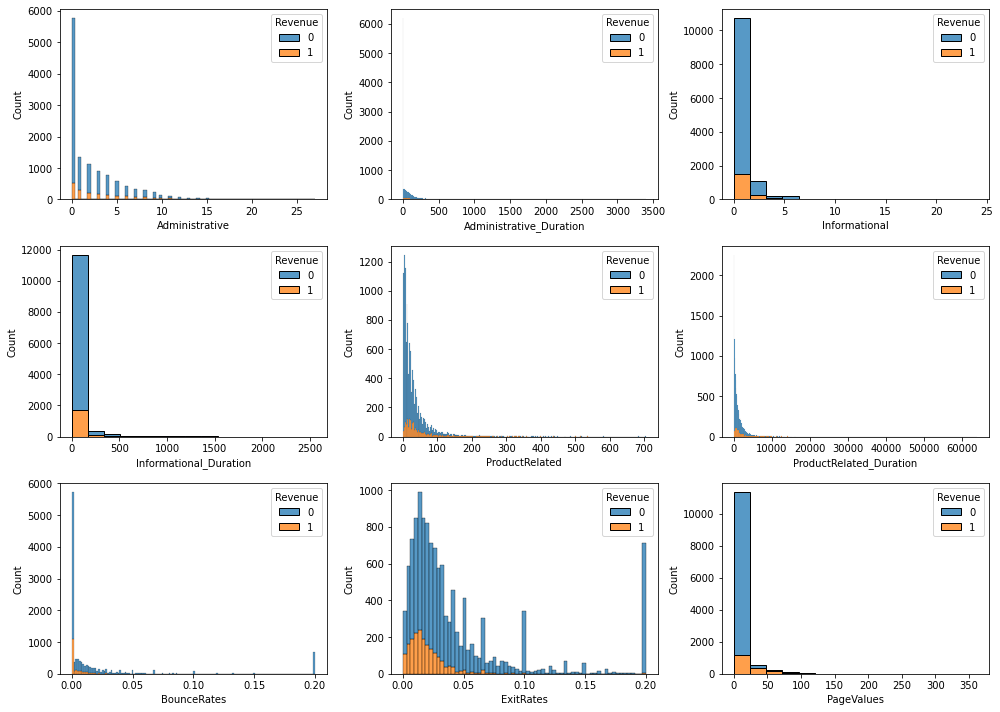

In [7]:
log_features = ['Administrative', 'Administrative_Duration', 'Informational',
                'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                'BounceRates', 'ExitRates', 'PageValues']
fig, ax = plt.subplots(3, 3, figsize=(14, 10))
for i, feature in enumerate(log_features):
    m, n = divmod(i, 3)
    sns.histplot(data, x=feature, hue="Revenue", multiple="stack", ax = ax[m, n])
plt.tight_layout()
plt.show()

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
transformer = ColumnTransformer(
    [ ('log', FunctionTransformer(np.log1p), log_features) ],
    remainder = 'passthrough'
)
transformed_data = transformer.fit_transform(data)

#### Skalowanie (standaryzacja) i utworzenie ramek do modelowania
Utworzymy kilka wersji ramek danych, by przetestować skutki działania algorytmów na różnych danych wejściowych. 

Motywem przewodnim naszego projektu jest segmentacja klientów w celu analizy biznesowej/CRM i w przypadku tego zadania nie wykluczamy w tym przypadku kluczowej zmiennej `Revenue`. 

Zdecydowaliśmy się jednak również przetestować możliwości algorytmów klasteryzujących w identyfikowaniu klientów przynoszących i nieprzynoszących dochodu, zatem stworzyliśmy też ramki danych bez zmiennej `Revenue`. 

In [9]:
## dane ustandaryzowane - pełne
data_scaled = scaler.fit_transform(transformed_data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)

In [10]:
# dane ustandaryzowane - bez "Revenue"
ds_without_revenue = data_scaled.drop("Revenue", axis = 1)

Odrzuciliśmy trzy kolumny, które mają wyraźne korelacje z odpowiadającymi im kolumnami dotyczącymi czasów korzystania ze stron danego rodzaju. 

In [11]:
# dane ustandaryzowane - bez wybranych kolumn 
ds_less_features = data_scaled.drop(["Administrative", "Informational", "ProductRelated"], axis = 1) 

In [12]:
# dane ustandaryzowane - bez "Revenue" i wybranych kolumn
ds_lf_without_revenue = ds_less_features.drop("Revenue", axis = 1)

#### Inny wariant encodingu zmiennych kategorycznych
W poprzednim etapie próbowaliśmy zmienić sposób kodowania zmiennych kategorycznych i wykorzystać one hot encoding. Jednak nie przyniosło to dobrych rezultatów. Spróbujemy jednak podejść do tego tematu jeszcze inaczej - zamiast wypełniać kolumny odpowiadające danym poziomom cechy jedynkami, będziemy ustawiać w nich wartości równe $\frac{1}{2m}$, gdzie $m$ oznacza liczbę unikatowych wartości danej, kodowanej zmiennej. Ze względu na to, że pracujemy z klasteryzacją, takie rozwiązanie może się okazać lepsze - nie będzie tworzyło ogromnych różnic w odległościach pomiędzy obserwacjami. 

Żeby nie spowodować znacznej i niepotrzebnej nadwymiarowości danych, zobaczymy najpierw jaki rozkład mają zmienne natury kategorycznej.

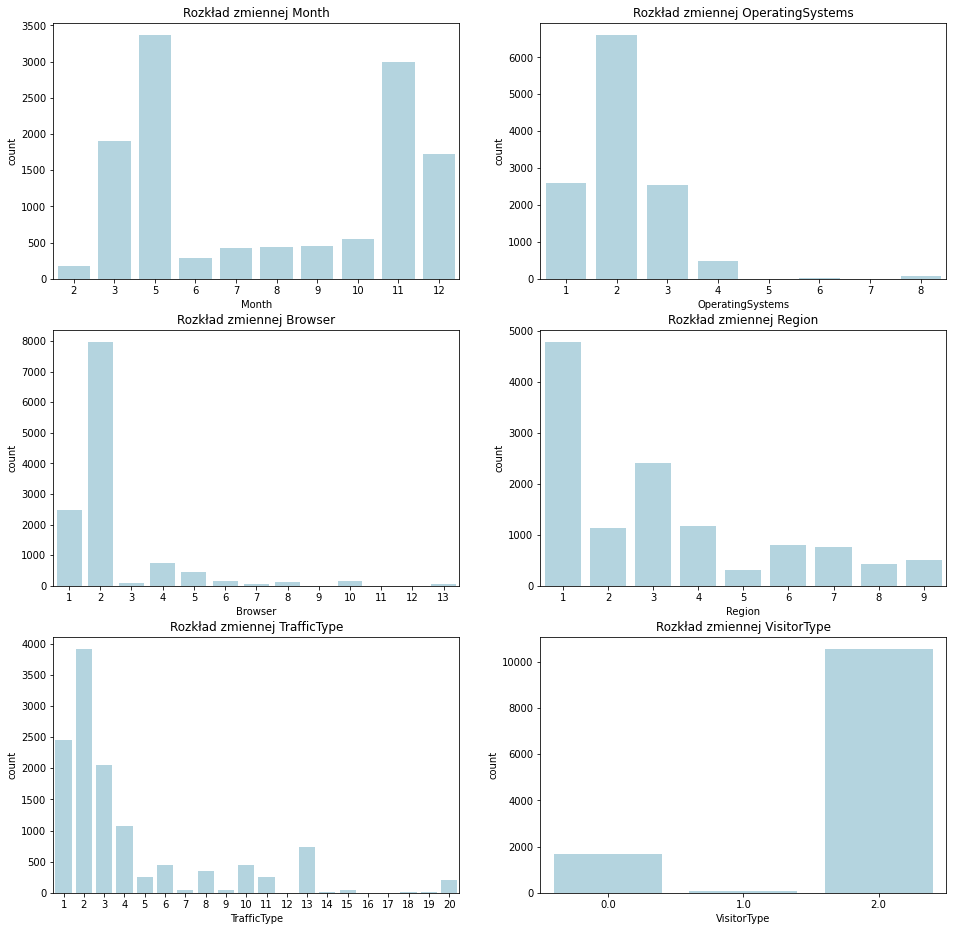

In [16]:
categorical = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
for i in range(0, len(categorical)):
    sns.countplot(data=data, x=categorical[i], 
                  ax=axes[i//2, i%2], color = "lightblue").set_title(f"Rozkład zmiennej {categorical[i]}")

Tak jak zauważyliśmy już w drugim etapie projektu: 
> W przypadku niektórych zmiennych, niewielka liczba kategorii odpowiada za większość wyników. Stąd pomysł, by dla każdej kolumny wziąć pierwsze najbardziej znaczące kategorie, pozostałe natomiast złączyć w jedną.

Dla miesięcy natomiast ograniczymy liczbę nowo powstałych kolumn poprzez zakodowanie ich przy pomocy współrzędnych biegunowych. Tym samym wprowadzimy też do danych informację o naturalnej cykliczności miesięcy - styczeń będzie obok grudnia. 


In [17]:
data_cat = pd.DataFrame(transformed_data, columns = data.columns)

In [18]:
import math
def encode_month_cyclical(X):
    X["MonthSin"] = 0 
    X["MonthCos"] = 0
    for i in range(1, 13):
        X.loc[X["Month"] == i, "MonthSin"] = math.sin(2*math.pi*i/12)
        X.loc[X["Month"] == i, "MonthCos"] = math.cos(2*math.pi*i/12)
    return X.drop("Month", axis = 1)

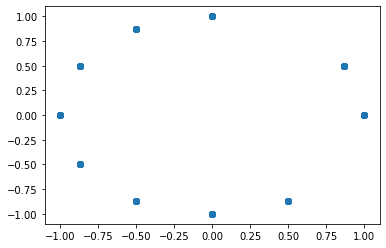

In [19]:
# wizualizacja miesięcy
data_cat = encode_month_cyclical(data_cat)
plt.scatter(x = data_cat["MonthSin"], y = data_cat["MonthCos"])
plt.show()

In [20]:
def encode_visitor_types(X):
    visitor_types = list(online_shopping["VisitorType"].unique())
    for v_type in visitor_types:
        X["VT_"+v_type] = 0 
        X.loc[online_shopping["VisitorType"] == v_type, "VT_"+v_type] = 1/(2*3)
    return X.drop("VisitorType", axis = 1)

In [21]:
data_cat = encode_visitor_types(data_cat)

In [22]:
# liczba kategorii do pozostawienia
most_relevant = {"TrafficType" : 5,
                 "Browser" : 2,
                 "OperatingSystems" : 4,
                 "Region" : 4}

def encode_other_variables(X):
    for variable in most_relevant:
        values_list = list(X[variable].value_counts().iloc[:most_relevant[variable]].index)
        for value in values_list:
            new_feat = variable+"_"+str(int(value))
            X[new_feat] = 0
            X.loc[X[variable] == value, new_feat] = 1 / (2 * (most_relevant[variable]))
        X.drop(variable, axis = 1, inplace = True)
    return X 

In [23]:
data_cat = encode_other_variables(data_cat)

In [24]:
data_cat.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'MonthSin', 'MonthCos', 'VT_Returning_Visitor',
       'VT_New_Visitor', 'VT_Other', 'TrafficType_2', 'TrafficType_1',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_13', 'Browser_2',
       'Browser_1', 'OperatingSystems_2', 'OperatingSystems_1',
       'OperatingSystems_3', 'OperatingSystems_4', 'Region_1', 'Region_3',
       'Region_4', 'Region_2'],
      dtype='object')

Pozostałe, niekategoryczne zmienne w przypadku tej ramki danych również ustandaryzujemy.

In [25]:
num_features = ['Administrative', 'Administrative_Duration', 'Informational',
                'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                'BounceRates', 'ExitRates', 'PageValues', "SpecialDay"]

scaler = ColumnTransformer(
    [ ('log', StandardScaler(), num_features)],
    remainder = 'passthrough'
)

scaled_data_cat = scaler.fit_transform(data_cat)
scaled_data_cat = pd.DataFrame(scaled_data_cat, columns = data_cat.columns)
scaled_data_cat

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser_2,Browser_1,OperatingSystems_2,OperatingSystems_1,OperatingSystems_3,OperatingSystems_4,Region_1,Region_3,Region_4,Region_2
0,-0.923678,-0.975402,-0.478085,-0.464858,-1.950729,-2.918505,3.629703,3.173418,-0.492303,-0.308821,...,0.00,0.25,0.000,0.125,0.000,0.000,0.125,0.000,0.0,0.000
1,-0.923678,-0.975402,-0.478085,-0.464858,-1.589955,-0.875249,-0.470378,1.217465,-0.492303,-0.308821,...,0.25,0.00,0.125,0.000,0.000,0.000,0.125,0.000,0.0,0.000
2,-0.923678,-0.975402,-0.478085,-0.464858,-1.950729,-2.918505,3.629703,3.173418,-0.492303,-0.308821,...,0.00,0.25,0.000,0.000,0.000,0.125,0.000,0.000,0.0,0.000
3,-0.923678,-0.975402,-0.478085,-0.464858,-1.589955,-2.282539,0.626824,2.020382,-0.492303,-0.308821,...,0.25,0.00,0.000,0.000,0.125,0.000,0.000,0.000,0.0,0.125
4,-0.923678,-0.975402,-0.478085,-0.464858,-0.433884,0.235343,-0.025053,0.171728,-0.492303,-0.308821,...,0.00,0.00,0.000,0.000,0.125,0.000,0.125,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.683032,1.131987,-0.478085,-0.464858,0.981830,0.746217,-0.310319,-0.281745,1.545432,-0.308821,...,0.00,0.00,0.000,0.000,0.000,0.125,0.125,0.000,0.0,0.000
12326,-0.923678,-0.975402,-0.478085,-0.464858,-0.973209,0.089703,-0.470378,-0.450525,-0.492303,-0.308821,...,0.25,0.00,0.000,0.000,0.125,0.000,0.125,0.000,0.0,0.000
12327,-0.923678,-0.975402,-0.478085,-0.464858,-0.836050,-0.362614,1.329637,0.943324,-0.492303,-0.308821,...,0.25,0.00,0.000,0.000,0.125,0.000,0.125,0.000,0.0,0.000
12328,0.941654,0.855910,-0.478085,-0.464858,-0.100490,-0.055411,-0.470378,-0.456704,-0.492303,-0.308821,...,0.25,0.00,0.125,0.000,0.000,0.000,0.000,0.125,0.0,0.000


In [24]:
sd_cat_without_revenue = scaled_data_cat.drop("Revenue", axis = 1)  # wariant ramki danych do zadania z targetem

## Zadanie 0.  Klasteryzacja danych bez zmiennej `Revenue` - identyfikacja klientów ze względu na generowanie przychodu

Wiedząc, że mamy dwa poziomy zmiennej `Revenue` (bowiem klient przynosi albo nie przynosi przychodu), wykorzystamy różne algorytmy klasteryzacji w celu podziału klientów na dwie grupy. Następnie sprawdzimy, jakie accuracy w porównaniu do rzeczywistych etykiet poszczególnych obserwacji osiągnęły wykorzystane modele. 

Algorytmy, które wykorzystamy to: 
- metoda k średnich,
- klasteryzacja hierarchiczna aglomeracyjna z różnymi metodami połączenia,
- GMM z różnymi typami kowariancji komponentów. 

Każdy z nich prztestujemy na trzech ramkach danych zdefiniowanych do tego zadania. 

In [315]:
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [313]:
clustering_algorithms = {
    "KMeans": KMeans(n_clusters = 2, random_state = 42),
    "Agglomerative w/ ward linkage": AgglomerativeClustering(n_clusters = 2, linkage = "ward"),
    "Agglomerative w/ complete linkage": AgglomerativeClustering(n_clusters = 2, linkage = "complete"),
    "Agglomerative w/ average linkage": AgglomerativeClustering(n_clusters = 2, linkage = "average"),
    "Agglomerative w/ single linkage": AgglomerativeClustering(n_clusters = 2, linkage = "single"),
    "GMM w/ full covariance": GaussianMixture(n_components = 2, covariance_type = "full", random_state = 42),
    "GMM w/ tied covariance": GaussianMixture(n_components = 2, covariance_type = "tied", random_state = 42),
    "GMM w/ diag covariance": GaussianMixture(n_components = 2, covariance_type = "diag", random_state = 42),
    "GMM w/ spherical covariance": GaussianMixture(n_components = 2, covariance_type = "spherical", random_state = 42)
}

datasets = {
    "df base": ds_without_revenue, 
    "df with less features": ds_lf_without_revenue,
    "df with categorical encoding": sd_cat_without_revenue
}

In [316]:
acc_results = pd.DataFrame()
for algo_name in clustering_algorithms: 
    for dataset_name in datasets:
        cluster_labels = clustering_algorithms[algo_name].fit_predict(datasets[dataset_name])
        acc = accuracy_score(data["Revenue"], cluster_labels)
        acc_results.loc[algo_name, dataset_name] = acc
    print(algo_name + " - done :)")

KMeans - done :)
Agglomerative w/ ward linkage - done :)
Agglomerative w/ complete linkage - done :)
Agglomerative w/ average linkage - done :)
Agglomerative w/ single linkage - done :)
GMM w/ full covariance - done :)
GMM w/ tied covariance - done :)
GMM w/ diag covariance - done :)
GMM w/ spherical covariance - done :)


In [317]:
acc_results.style.background_gradient(cmap="viridis")

,df base,df with less features,df with categorical encoding
KMeans,0.418897,0.760827,0.417843
Agglomerative w/ ward linkage,0.786212,0.755718,0.784915
Agglomerative w/ complete linkage,0.842498,0.839822,0.501622
Agglomerative w/ average linkage,0.842903,0.157097,0.845012
Agglomerative w/ single linkage,0.845174,0.845174,0.845174
GMM w/ full covariance,0.234144,0.476318,0.333171
GMM w/ tied covariance,0.436983,0.780860,0.782806
GMM w/ diag covariance,0.463828,0.476318,0.485969
GMM w/ spherical covariance,0.422871,0.775750,0.786456


Okazuje się, że najlepiej w tym wypadku poradził sobie algorytm klasteryzacji aglomeracyjnej z połączeniem pojedynczym. Przypomnijmy, że w tym połączeniu odległość między dwoma klastrami jest minimalną odległością między obserwacją w jednym klastrze a obserwacją w innym klastrze.

Zauważmy też, że algorytm osiągnął ten sam wynik na każdym zestawie danych, zatem przy podziale kluczowe musiały być niezmienne cechy. Osiągnięty wynik to ok. 84.5% trafności - pokrywających się etykiet, więc można to uznać za dobry wynik...

Jednak należy pamiętać, że zbiór nie jest zrównoważony (ok. 1900 klientów przynoszących dochód i 10400 nieprzynoszących). Zatem sprawdźmy, jak to rzeczywiście wygląda...

In [345]:
data.Revenue.value_counts

0    10422
1     1908
Name: Revenue, dtype: int64

In [346]:
from sklearn.metrics import classification_report

In [347]:
ac_single_labels = AgglomerativeClustering(n_clusters = 2, linkage = "single").fit_predict(ds_without_revenue)

In [352]:
print(classification_report(data["Revenue"], ac_single_labels))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     10422
           1       0.00      0.00      0.00      1908

    accuracy                           0.85     12330
   macro avg       0.42      0.50      0.46     12330
weighted avg       0.71      0.85      0.77     12330



In [354]:
sum(ac_single_labels == 1)

1

Zaledwie jedna obserwacja została sklasyfikowana jako klient przynoszący dochód. Ponadto po wynikach miar dla grup widzimy, jak zła jest to klasteryzacja w kontekście pożądanego efektu. Przetestujmy zatem jeszcze raz wszystkie algorytmy, ale sprawdzając ich wynik w mierze F1 macro. 

In [340]:
from sklearn.metrics import f1_score
f1_macro_results = pd.DataFrame()
for algo_name in clustering_algorithms: 
    for dataset_name in datasets:
        cluster_labels = clustering_algorithms[algo_name].fit_predict(datasets[dataset_name])
        f1_macro = f1_score(data["Revenue"], cluster_labels, average = "macro")
        f1_macro_results.loc[algo_name, dataset_name] = f1_macro
    print(algo_name + " - done :)")

KMeans - done :)
Agglomerative w/ ward linkage - done :)
Agglomerative w/ complete linkage - done :)
Agglomerative w/ average linkage - done :)
Agglomerative w/ single linkage - done :)
GMM w/ full covariance - done :)
GMM w/ tied covariance - done :)
GMM w/ diag covariance - done :)
GMM w/ spherical covariance - done :)


In [341]:
f1_macro_results.style.background_gradient(cmap="viridis")

,df base,df with less features,df with categorical encoding
KMeans,0.334671,0.434074,0.339267
Agglomerative w/ ward linkage,0.441275,0.431407,0.440861
Agglomerative w/ complete linkage,0.465798,0.466318,0.358813
Agglomerative w/ average linkage,0.465444,0.137748,0.457998
Agglomerative w/ single linkage,0.458046,0.458046,0.458046
GMM w/ full covariance,0.204634,0.334301,0.265043
GMM w/ tied covariance,0.363637,0.439564,0.440554
GMM w/ diag covariance,0.329124,0.334301,0.337826
GMM w/ spherical covariance,0.339874,0.437923,0.441353


Okazuje się, że rzeczywiście algorytm aglomeracyjny z połączeniem pojedynczym poradził sobie najlepiej (jeśli można w przypadku takiego wyniku mówić o radzeniu sobie). Pokazuje to, że rzeczywiście klasteryzacja nie jest dobrym pomysłem jeśli chodzi o predykcje etykiety - od tego są inne algorytmy. Natomiast przykład ten jest też ciekawy z perspektywi nauki, by nie "żyłować" accuracy naiwnie i bez głębszego zbadania sytuacji. 

## Zadanie 1. Klasteryzacja "biznesowa" - segmentacja klientów

Począwszy od pierwszego etapu projektu, postawiliśmy sobie za cel segmentację klientów w podgrupach przynoszących dochód i nieprzynoszących dochodu. Ma to zastosowanie w biznesie w systemach CRM (Customer Relationship Management). Zatem w poniższej sekcji będziemy szukać klastrów, wykorzystując zmienną `Revenue`, a liczba klastrów nie będzie z góry narzucona (poszukiwać będziemy od 2 do 12 klastrów).

W celu porównania otrzymanych klasteryzacji wykorzystamy trzy miary zdefiniowane w pakiecie sklearn: 
- miara silhouette - wykorzystuje średnią odległość pomiędzy obserwacjami wewnątrz grupy (ozn. $a$) i średnią odległość obserwacji do najbliższej „obcej” grupy (ozn. $b$). Silhouette obliczany jest dla każdej obserwacji w następujący sposób: $\frac{a – b}{max(a, b)}$, a dla całego zbioru jest to średnia tych wyników. Najlepsza wartość miary to 1, a najgorsza -1. Wartości w pobliżu 0 oznaczają pokrywające się klastry.
- Caliński-Harabasz score - obliczany jako stosunek sumy kwadratów odległości między klastrami do sumy kwadratów odległości obserwacji od środka ich klastra. Czym wyższa wartość, tym lepiej.
- Davies-Bouldin score - definiowany intuicyjnie jako średnia miara podobieństwa każdego klastra z najbliższym mu klastrem, gdzie podobieństwo to stosunek odległości obiektów wewnątrz klastra do odległości pomiędzy klastrami. Zatem bardziej oddalone i odseparowane klastry mają lepszy rezultat - minimalna wartość to 0 i czym mniejsza, tym lepsza.

In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#### Dla bazowego zbioru danych

In [305]:
silhouette_scores = pd.DataFrame()
calinski_harabasz_scores = pd.DataFrame()
davies_bouldin_scores = pd.DataFrame()
revenue_ratios = pd.DataFrame()

def calculate_revenue_ratio(labels):
    X = data.copy()
    X["labels"] = labels
    return str(sorted(list(np.round(X.groupby("labels")["Revenue"].mean(), 3))))

def calculate_clustering_metrics(dataset, max_n_clusters):
    for i in range(2, max_n_clusters+1):
        for algo_name in clustering_algorithms: 
            model = clustering_algorithms[algo_name]
            if "KMeans" in algo_name or "Agglomerative" in algo_name:
                model.n_clusters = i
            else:
                model.n_components = i
            cluster_labels = model.fit_predict(dataset)
            silhouette_scores.loc[algo_name, i] = silhouette_score(dataset, cluster_labels)
            calinski_harabasz_scores.loc[algo_name, i] = calinski_harabasz_score(dataset, cluster_labels)
            davies_bouldin_scores.loc[algo_name, i] = davies_bouldin_score(dataset, cluster_labels)
            revenue_ratios.loc[algo_name, i] = calculate_revenue_ratio(cluster_labels)
            print("Clustering for " + str(i) + " clusters with " + algo_name + " - done :)")

In [306]:
calculate_clustering_metrics(data_scaled, 12)

Clustering for 2 clusters with KMeans - done :)
Clustering for 2 clusters with Agglomerative w/ ward linkage - done :)
Clustering for 2 clusters with Agglomerative w/ complete linkage - done :)
Clustering for 2 clusters with Agglomerative w/ average linkage - done :)
Clustering for 2 clusters with Agglomerative w/ single linkage - done :)
Clustering for 2 clusters with GMM w/ full covariance - done :)
Clustering for 2 clusters with GMM w/ tied covariance - done :)
Clustering for 2 clusters with GMM w/ diag covariance - done :)
Clustering for 2 clusters with GMM w/ spherical covariance - done :)
Clustering for 3 clusters with KMeans - done :)
Clustering for 3 clusters with Agglomerative w/ ward linkage - done :)
Clustering for 3 clusters with Agglomerative w/ complete linkage - done :)
Clustering for 3 clusters with Agglomerative w/ average linkage - done :)
Clustering for 3 clusters with Agglomerative w/ single linkage - done :)
Clustering for 3 clusters with GMM w/ full covariance - d

In [76]:
silhouette_scores.to_pickle("ds_silhouette_scores.pkl")

In [7]:
ds_silhouette_scores = pd.read_pickle("ds_silhouette_scores.pkl")
ds_silhouette_scores.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,0.148107,0.180147,0.156469,0.158151,0.195898,0.167178,0.161568,0.145689,0.170995,0.146657,0.137471
Agglomerative w/ ward linkage,0.314525,0.173564,0.161069,0.165942,0.177157,0.184669,0.120442,0.130290,0.131475,0.136675,0.139058
Agglomerative w/ complete linkage,0.495609,0.177042,0.176423,0.190428,0.189946,0.178574,0.165444,0.106125,0.103674,0.088053,0.077062
Agglomerative w/ average linkage,0.495739,0.365303,0.336938,0.319016,0.272151,0.271811,0.251457,0.247835,0.231148,0.219760,0.210487
Agglomerative w/ single linkage,0.491697,0.391906,0.360294,0.350493,0.349536,0.339770,0.318122,0.291196,0.296782,0.287284,0.262191
GMM w/ full covariance,0.133530,0.126167,0.106302,0.136996,0.073549,0.099641,0.102286,0.105518,0.117073,0.125303,0.094785
GMM w/ tied covariance,0.317452,0.201473,0.202285,0.153224,0.117179,0.113981,0.114723,0.124715,0.130629,0.128859,0.123212
GMM w/ diag covariance,0.133530,0.126666,0.106241,0.136047,0.082661,0.111879,0.093757,0.104254,0.135050,0.144464,0.114726
GMM w/ spherical covariance,0.299008,0.203461,0.130888,0.102841,0.066335,0.071686,0.088701,0.129607,0.132631,0.134621,0.080073


In [84]:
calinski_harabasz_scores.to_pickle("ds_calinski_harabasz_scores.pkl")

In [8]:
ds_calinski_harabasz_scores = pd.read_pickle("ds_calinski_harabasz_scores.pkl")
ds_calinski_harabasz_scores.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,2300.619553,2146.701036,2028.214597,1903.070607,1701.064393,1695.191776,1561.278040,1472.099685,1413.069579,1338.233214,1277.379826
Agglomerative w/ ward linkage,1793.123846,1802.317192,1652.614415,1529.384816,1483.754303,1406.280931,1352.173352,1308.843834,1252.238366,1205.328509,1162.532160
Agglomerative w/ complete linkage,334.153490,1100.476413,774.441711,1159.720245,934.751034,940.900935,873.200377,883.623683,790.887674,738.299778,678.827920
Agglomerative w/ average linkage,328.009108,168.144672,113.035650,90.838287,453.812719,378.797130,337.997874,296.732594,266.889933,240.701455,219.077270
Agglomerative w/ single linkage,6.236850,5.173904,4.711043,4.530408,14.791214,13.761791,12.360311,11.233439,40.652613,38.383840,35.170467
GMM w/ full covariance,2047.079036,1757.869784,1459.474987,1703.016488,1017.362608,1057.472518,930.334751,888.451617,852.630486,960.703289,835.255295
GMM w/ tied covariance,1889.315633,2029.625237,1862.928872,1842.481749,1518.706244,1434.351531,1279.316132,1255.043320,1210.715198,1118.317507,1124.370583
GMM w/ diag covariance,2047.079036,1762.219908,1459.215379,1742.774224,1048.742104,1122.494198,1000.410554,866.166583,1038.197947,1006.326777,885.382183
GMM w/ spherical covariance,1922.942208,2068.557620,1685.961898,1531.567886,1299.081401,1400.239158,1371.517753,1373.092524,1286.197884,1198.302581,1105.404171


In [94]:
davies_bouldin_scores.to_pickle("ds_davies_bouldin_scores.pkl")

In [9]:
ds_davies_bouldin_scores = pd.read_pickle("ds_davies_bouldin_scores.pkl")
ds_davies_bouldin_scores.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,2.202102,1.883029,2.005969,1.889375,1.710053,1.708779,1.734183,1.767830,1.691508,1.783577,1.759676
Agglomerative w/ ward linkage,1.028630,1.616018,2.042855,1.981869,1.729583,1.705689,1.798332,1.752517,1.676740,1.600241,1.668480
Agglomerative w/ complete linkage,0.828300,1.521576,1.554514,1.483098,1.407197,1.440402,1.557003,1.905428,1.804482,2.126383,2.099764
Agglomerative w/ average linkage,0.853278,1.116227,0.774765,0.929920,0.930157,0.860120,0.952783,0.894727,1.013981,0.971117,0.937227
Agglomerative w/ single linkage,0.381138,0.440070,0.457339,0.461187,0.445223,0.499176,0.496817,0.499615,0.525257,0.517815,0.520907
GMM w/ full covariance,2.256536,2.318313,2.264953,1.963663,2.499442,2.346092,2.259786,2.252115,2.628988,2.366331,2.528555
GMM w/ tied covariance,1.055517,1.622122,1.676626,1.896288,2.218529,2.061352,2.186015,2.050946,2.085586,2.112028,1.962340
GMM w/ diag covariance,2.256536,2.320509,2.264072,2.021943,2.721001,2.184825,2.337971,2.505594,2.088241,2.159244,2.502525
GMM w/ spherical covariance,1.088987,1.563026,2.415223,2.469910,2.463300,2.149432,2.132252,2.031547,2.060278,2.048892,2.088260


In [99]:
revenue_ratios.to_pickle("ds_revenue_ratios.pkl")

In [125]:
ds_revenue_ratios = pd.read_pickle("ds_revenue_ratios.pkl")
ds_revenue_ratios

,2,3,4,5,6,7,8,9,10,11,12
KMeans,"[0.023, 0.275]","[0.004, 0.065, 0.381]","[0.004, 0.024, 0.246, 0.283]","[0.0, 0.004, 0.006, 0.2, 0.981]","[0.004, 0.011, 0.026, 0.071, 0.207, 0.787]","[0.005, 0.013, 0.013, 0.026, 0.071, 0.214, 0.988]","[0.005, 0.012, 0.026, 0.026, 0.04, 0.071, 0.22...","[0.002, 0.005, 0.025, 0.028, 0.056, 0.066, 0.0...","[0.0, 0.005, 0.008, 0.013, 0.027, 0.042, 0.069...","[0.0, 0.0, 0.005, 0.029, 0.031, 0.043, 0.045, ...","[0.0, 0.004, 0.011, 0.029, 0.031, 0.031, 0.039..."
Agglomerative w/ ward linkage,"[0.004, 0.164]","[0.004, 0.151, 0.229]","[0.004, 0.02, 0.229, 0.531]","[0.004, 0.015, 0.051, 0.229, 0.531]","[0.004, 0.015, 0.051, 0.1, 0.229, 1.0]","[0.0, 0.004, 0.051, 0.1, 0.208, 0.229, 1.0]","[0.0, 0.0, 0.004, 0.051, 0.1, 0.208, 0.229, 1.0]","[0.0, 0.0, 0.001, 0.004, 0.051, 0.1, 0.208, 0....","[0.0, 0.0, 0.0, 0.003, 0.004, 0.051, 0.1, 0.20...","[0.0, 0.0, 0.0, 0.003, 0.004, 0.051, 0.1, 0.2,...","[0.0, 0.0, 0.0, 0.0, 0.003, 0.004, 0.051, 0.1,..."
Agglomerative w/ complete linkage,"[0.154, 0.254]","[0.136, 0.233, 0.254]","[0.128, 0.137, 0.233, 0.254]","[0.003, 0.128, 0.151, 0.233, 0.254]","[0.003, 0.128, 0.151, 0.233, 0.25, 0.255]","[0.003, 0.064, 0.128, 0.158, 0.233, 0.25, 0.255]","[0.003, 0.064, 0.128, 0.131, 0.159, 0.233, 0.2...","[0.003, 0.04, 0.064, 0.128, 0.131, 0.233, 0.25...","[0.0, 0.003, 0.04, 0.064, 0.131, 0.167, 0.233,...","[0.0, 0.003, 0.04, 0.047, 0.064, 0.131, 0.167,...","[0.0, 0.0, 0.003, 0.04, 0.047, 0.064, 0.131, 0..."
Agglomerative w/ average linkage,"[0.154, 0.286]","[0.0, 0.154, 0.286]","[0.0, 0.0, 0.154, 0.286]","[0.0, 0.0, 0.154, 0.264, 0.4]","[0.0, 0.0, 0.004, 0.163, 0.264, 0.4]","[0.0, 0.0, 0.0, 0.004, 0.163, 0.269, 0.4]","[0.0, 0.0, 0.0, 0.004, 0.108, 0.163, 0.269, 0.4]","[0.0, 0.0, 0.0, 0.0, 0.004, 0.108, 0.163, 0.26...","[0.0, 0.0, 0.0, 0.0, 0.004, 0.071, 0.108, 0.16...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.004, 0.083, 0.108,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.004, 0.083, 0.083,..."
Agglomerative w/ single linkage,"[0.0, 0.155]","[0.0, 0.155, 1.0]","[0.0, 0.0, 0.155, 1.0]","[0.0, 0.0, 0.155, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.155, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.155, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.155, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.155, 1.0, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.154, 0.311, 1.0, 1.0, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.154, 0.311, 1.0, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.154, 0.311, 1..."
GMM w/ full covariance,"[0.0, 0.253]","[0.0, 0.233, 0.25]","[0.0, 0.0, 0.244, 0.689]","[0.0, 0.0, 0.0, 0.249, 1.0]","[0.0, 0.0, 0.0, 0.227, 0.24, 1.0]","[0.0, 0.0, 0.0, 0.083, 0.151, 0.47, 1.0]","[0.0, 0.0, 0.0, 0.105, 0.151, 0.208, 0.217, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.063, 0.097, 0.148, 1.0,...","[0.0, 0.0, 0.0, 0.0, 0.074, 0.152, 0.508, 0.84...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14, 0.169, 1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.059, 0.233, 0..."
GMM w/ tied covariance,"[0.004, 0.165]","[0.004, 0.148, 0.234]","[0.0, 0.004, 0.211, 1.0]","[0.0, 0.0, 0.004, 0.164, 1.0]","[0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]"
GMM w/ diag covariance,"[0.0, 0.253]","[0.0, 0.233, 0.264]","[0.0, 0.0, 0.244, 0.689]","[0.0, 0.0, 0.0, 0.239, 1.0]","[0.0, 0.0, 0.0, 0.194, 0.237, 1.0]","[0.0, 0.0, 0.0, 0.15, 0.218, 0.247, 1.0]","[0.0, 0.0, 0.0, 0.048, 0.154, 0.244, 0.262, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.021, 0.22, 0.492, 0.796...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.251, 0.301, 0.812,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.511, 0.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.058, 0.4..."
GMM w/ spherical covariance,"[0.003, 0.166]","[0.004, 0.146, 0.259]","[0.003, 0.004, 0.225, 0.293]","[0.003, 0.004, 0.018, 0.222, 0.427]","[0.0, 0.004, 0.009, 0.021, 0.224, 0.402]","[0.0, 0.004, 0.008, 0.009, 0.014, 0.2, 0.7]","[0.0, 0.0, 0.003, 0.014, 0.017, 0.209, 0.213, ...","[0.0, 0.0, 0.002, 0.016, 0.017, 0.049, 0.183, ...","[0.0, 0.0, 0.0, 0.002, 0

#### Dla zbioru danych ze zmienionym kodowaniem zmiennych kategorycznych

In [328]:
calculate_clustering_metrics(scaled_data_cat, 12)

Clustering for 2 clusters with KMeans - done :)
Clustering for 2 clusters with Agglomerative w/ ward linkage - done :)
Clustering for 2 clusters with Agglomerative w/ complete linkage - done :)
Clustering for 2 clusters with Agglomerative w/ average linkage - done :)
Clustering for 2 clusters with Agglomerative w/ single linkage - done :)
Clustering for 2 clusters with GMM w/ full covariance - done :)
Clustering for 2 clusters with GMM w/ tied covariance - done :)
Clustering for 2 clusters with GMM w/ diag covariance - done :)
Clustering for 2 clusters with GMM w/ spherical covariance - done :)
Clustering for 3 clusters with KMeans - done :)
Clustering for 3 clusters with Agglomerative w/ ward linkage - done :)
Clustering for 3 clusters with Agglomerative w/ complete linkage - done :)
Clustering for 3 clusters with Agglomerative w/ average linkage - done :)
Clustering for 3 clusters with Agglomerative w/ single linkage - done :)
Clustering for 3 clusters with GMM w/ full covariance - d

In [103]:
silhouette_scores.to_pickle("ds_cat_silhouette_scores.pkl")

In [10]:
ds_cat_silhouette_scores = pd.read_pickle("ds_cat_silhouette_scores.pkl")
ds_cat_silhouette_scores.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,0.223671,0.311882,0.257873,0.278490,0.279327,0.239846,0.230272,0.231679,0.221209,0.214832,0.216019
Agglomerative w/ ward linkage,0.436429,0.296854,0.233333,0.252979,0.256746,0.249724,0.186844,0.189343,0.193446,0.197392,0.189266
Agglomerative w/ complete linkage,0.208110,0.199788,0.238877,0.191884,0.193713,0.205001,0.135610,0.124859,0.149399,0.153535,0.154295
Agglomerative w/ average linkage,0.502079,0.387761,0.290850,0.273507,0.258565,0.268525,0.239595,0.233315,0.219400,0.220003,0.241099
Agglomerative w/ single linkage,0.502079,0.408247,0.159107,0.154679,0.045682,-0.004266,-0.009394,-0.014067,-0.024107,-0.024350,-0.055172
GMM w/ full covariance,0.188337,0.111897,0.160878,0.174853,0.168259,0.139452,0.049313,0.049775,0.067136,-0.017277,0.041881
GMM w/ tied covariance,0.213759,0.235915,0.252738,0.250536,0.272287,0.263648,0.167111,0.161039,0.164864,0.169994,0.174063
GMM w/ diag covariance,0.146381,0.066243,0.163841,0.186312,0.183986,0.167666,0.110250,0.139680,0.175275,0.156608,0.072319
GMM w/ spherical covariance,0.223763,0.184735,0.250786,0.237050,0.274103,0.270036,0.207042,0.205829,0.209429,0.217593,0.207171


In [104]:
calinski_harabasz_scores.to_pickle("ds_cat_calinski_harabasz_scores.pkl")

In [11]:
ds_cat_calinski_harabasz_scores = pd.read_pickle("ds_cat_calinski_harabasz_scores.pkl")
ds_cat_calinski_harabasz_scores.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,3896.639910,4147.700269,4335.267505,4233.015883,4116.345194,3824.078223,3577.301594,3360.873484,3173.138761,3033.180569,2885.310311
Agglomerative w/ ward linkage,3083.688727,3706.946499,3793.574498,3835.217906,3764.792425,3419.721723,3160.158604,2952.727715,2796.304251,2670.127325,2563.046244
Agglomerative w/ complete linkage,2991.799253,1947.604650,2832.071175,2234.833747,2023.220927,2002.931855,1902.109551,2017.216032,2139.059173,2013.368665,1864.507511
Agglomerative w/ average linkage,7.036317,1586.669138,1063.609131,1955.724583,1625.853144,1803.653182,1548.273232,1356.228008,1300.980146,1220.804144,1480.622827
Agglomerative w/ single linkage,7.036317,5.820144,4.421812,4.976770,4.220247,3.752747,3.624959,3.563788,4.292879,4.253254,3.951684
GMM w/ full covariance,3124.590741,1517.125226,1973.299823,2577.660400,2097.461241,1755.890516,1437.603041,1130.794988,1176.520678,997.237526,1448.361957
GMM w/ tied covariance,3466.187881,3757.274362,4173.505658,3807.193211,3940.751155,3561.782678,3014.642661,2875.076153,2712.743857,2600.854417,2509.646289
GMM w/ diag covariance,2345.760667,1846.559240,2015.480823,2796.407763,2306.582107,1920.459323,1498.628019,1841.363242,1936.515448,1703.395649,1460.251328
GMM w/ spherical covariance,3895.548155,3103.280517,4200.674404,3767.329371,4053.223196,3718.451771,3326.109193,3218.289622,3032.555099,2935.520403,2811.824522


In [106]:
davies_bouldin_scores.to_pickle("ds_cat_davies_bouldin_scores.pkl")

In [12]:
ds_cat_davies_bouldin_scores = pd.read_pickle("ds_cat_davies_bouldin_scores.pkl")
ds_cat_davies_bouldin_scores.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,1.663742,1.192681,1.348372,1.226510,1.189348,1.290325,1.451323,1.451783,1.437034,1.515819,1.560027
Agglomerative w/ ward linkage,0.654471,1.141150,1.424158,1.270964,1.235243,1.453585,1.546915,1.510365,1.567060,1.572271,1.620974
Agglomerative w/ complete linkage,1.814140,1.560453,1.324231,1.373820,1.498898,1.606832,1.638699,1.771253,1.725186,1.688444,1.663576
Agglomerative w/ average linkage,0.350766,0.601077,0.679181,0.934585,0.995676,1.020590,1.063479,1.061101,1.141739,1.143940,1.179740
Agglomerative w/ single linkage,0.350766,0.406063,0.561104,0.579337,0.645006,0.664614,0.650323,0.636433,0.670379,0.652264,0.682005
GMM w/ full covariance,1.788771,4.157457,2.947099,1.558166,1.706010,2.906958,4.532421,3.159527,2.767866,3.111944,6.433111
GMM w/ tied covariance,1.748827,1.394966,1.343602,1.300746,1.192582,1.430139,2.038886,2.136643,2.085171,2.140124,2.093920
GMM w/ diag covariance,2.158531,2.768936,2.819219,1.514687,1.642218,2.347208,3.210173,4.633959,2.881522,3.118134,4.322862
GMM w/ spherical covariance,1.663976,1.477790,1.320817,1.268932,1.192657,1.396983,1.400280,1.535529,1.554034,1.543479,1.518564


In [109]:
revenue_ratios.to_pickle("ds_cat_revenue_ratios.pkl")

In [130]:
ds_cat_revenue_ratios = pd.read_pickle("ds_cat_revenue_ratios.pkl")
ds_cat_revenue_ratios

,2,3,4,5,6,7,8,9,10,11,12
KMeans,"[0.066, 0.242]","[0.004, 0.148, 0.246]","[0.004, 0.097, 0.21, 0.244]","[0.005, 0.055, 0.107, 0.213, 0.248]","[0.005, 0.036, 0.043, 0.062, 0.235, 0.681]","[0.004, 0.026, 0.044, 0.055, 0.062, 0.236, 0.685]","[0.004, 0.026, 0.045, 0.056, 0.062, 0.108, 0.3...","[0.004, 0.019, 0.044, 0.046, 0.056, 0.096, 0.3...","[0.004, 0.005, 0.028, 0.042, 0.056, 0.073, 0.0...","[0.004, 0.005, 0.018, 0.025, 0.043, 0.074, 0.0...","[0.004, 0.016, 0.017, 0.019, 0.042, 0.051, 0.0..."
Agglomerative w/ ward linkage,"[0.004, 0.164]","[0.004, 0.145, 0.244]","[0.004, 0.036, 0.244, 0.259]","[0.004, 0.031, 0.055, 0.244, 0.259]","[0.004, 0.031, 0.055, 0.057, 0.244, 0.651]","[0.004, 0.031, 0.055, 0.057, 0.127, 0.408, 0.651]","[0.004, 0.014, 0.055, 0.057, 0.062, 0.127, 0.4...","[0.004, 0.014, 0.055, 0.057, 0.062, 0.127, 0.4...","[0.004, 0.014, 0.024, 0.057, 0.062, 0.118, 0.1...","[0.004, 0.014, 0.024, 0.057, 0.062, 0.08, 0.11...","[0.004, 0.012, 0.023, 0.024, 0.057, 0.062, 0.0..."
Agglomerative w/ complete linkage,"[0.11, 0.246]","[0.095, 0.11, 0.264]","[0.004, 0.095, 0.12, 0.264]","[0.004, 0.095, 0.12, 0.263, 0.292]","[0.004, 0.076, 0.095, 0.12, 0.292, 0.338]","[0.004, 0.052, 0.076, 0.095, 0.124, 0.292, 0.338]","[0.004, 0.03, 0.052, 0.076, 0.095, 0.132, 0.29...","[0.004, 0.03, 0.052, 0.076, 0.095, 0.132, 0.29...","[0.004, 0.03, 0.039, 0.052, 0.076, 0.095, 0.29...","[0.004, 0.03, 0.039, 0.052, 0.062, 0.095, 0.10...","[0.004, 0.03, 0.039, 0.052, 0.062, 0.073, 0.10..."
Agglomerative w/ average linkage,"[0.0, 0.155]","[0.0, 0.004, 0.165]","[0.0, 0.0, 0.004, 0.165]","[0.0, 0.0, 0.004, 0.146, 0.238]","[0.0, 0.0, 0.004, 0.137, 0.146, 0.243]","[0.0, 0.0, 0.004, 0.059, 0.137, 0.155, 0.243]","[0.0, 0.0, 0.0, 0.004, 0.059, 0.137, 0.155, 0....","[0.0, 0.0, 0.0, 0.0, 0.004, 0.059, 0.137, 0.15...","[0.0, 0.0, 0.0, 0.0, 0.004, 0.059, 0.137, 0.15...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.005, 0.059, 0.137,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.005, 0.038, 0.059,..."
Agglomerative w/ single linkage,"[0.0, 0.155]","[0.0, 0.0, 0.155]","[0.0, 0.0, 0.0, 0.155]","[0.0, 0.0, 0.0, 0.0, 0.155]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.155]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.155]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.155]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.155]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
GMM w/ full covariance,"[0.005, 0.244]","[0.0, 0.175, 0.252]","[0.0, 0.158, 0.234, 0.241]","[0.0, 0.0, 0.078, 0.25, 0.637]","[0.0, 0.0, 0.084, 0.164, 0.273, 0.639]","[0.0, 0.03, 0.053, 0.156, 0.24, 0.244, 0.642]","[0.0, 0.0, 0.0, 0.112, 0.173, 0.251, 0.644, 0.66]","[0.0, 0.0, 0.0, 0.0, 0.164, 0.241, 0.27, 0.381...","[0.0, 0.0, 0.0, 0.0, 0.086, 0.147, 0.149, 0.35...","[0.0, 0.0, 0.0, 0.0, 0.082, 0.1, 0.148, 0.29, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.079, 0.173, 0.212,..."
GMM w/ tied covariance,"[0.096, 0.215]","[0.004, 0.109, 0.215]","[0.004, 0.1, 0.205, 0.235]","[0.004, 0.03, 0.072, 0.231, 0.686]","[0.004, 0.033, 0.05, 0.077, 0.236, 0.685]","[0.004, 0.032, 0.032, 0.074, 0.104, 0.469, 0.66]","[0.004, 0.029, 0.035, 0.046, 0.05, 0.099, 0.23...","[0.004, 0.027, 0.032, 0.034, 0.041, 0.096, 0.1...","[0.004, 0.026, 0.032, 0.035, 0.042, 0.095, 0.1...","[0.004, 0.023, 0.03, 0.034, 0.04, 0.088, 0.102...","[0.004, 0.015, 0.024, 0.028, 0.036, 0.038, 0.0..."
GMM w/ diag covariance,"[0.0, 0.344]","[0.0, 0.107, 0.278]","[0.0, 0.122, 0.241, 0.243]","[0.0, 0.0, 0.079, 0.246, 0.638]","[0.0, 0.0, 0.085, 0.16, 0.248, 0.643]","[0.0, 0.0, 0.06, 0.165, 0.209, 0.256, 0.656]","[0.0, 0.0, 0.0, 0.034, 0.176, 0.247, 0.374, 0....","[0.0, 0.0, 0.0, 0.0, 0.219, 0.248, 0.275, 0.62...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.273, 0.507, 0.529,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.161, 0.233, 0.354,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.158, 0.234, 0.43, ..."
GMM w/ spherical covariance,"[0.07, 0.239]","[0.004, 0.029, 0.248]","[0.004, 0.095, 0.21, 0.244]","[0.004, 0.037, 0.052, 0.231, 0.664]","[0.005, 0.033, 

#### Dla zbioru danych bez trzech wyraźnie skorelowanych kolumn

In [333]:
calculate_clustering_metrics(ds_less_features, 12)

Clustering for 2 clusters with KMeans - done :)
Clustering for 2 clusters with Agglomerative w/ ward linkage - done :)
Clustering for 2 clusters with Agglomerative w/ complete linkage - done :)
Clustering for 2 clusters with Agglomerative w/ average linkage - done :)
Clustering for 2 clusters with Agglomerative w/ single linkage - done :)
Clustering for 2 clusters with GMM w/ full covariance - done :)
Clustering for 2 clusters with GMM w/ tied covariance - done :)
Clustering for 2 clusters with GMM w/ diag covariance - done :)
Clustering for 2 clusters with GMM w/ spherical covariance - done :)
Clustering for 3 clusters with KMeans - done :)
Clustering for 3 clusters with Agglomerative w/ ward linkage - done :)
Clustering for 3 clusters with Agglomerative w/ complete linkage - done :)
Clustering for 3 clusters with Agglomerative w/ average linkage - done :)
Clustering for 3 clusters with Agglomerative w/ single linkage - done :)
Clustering for 3 clusters with GMM w/ full covariance - d

In [111]:
silhouette_scores.to_pickle("ds_lf_silhouette_scores.pkl")

In [13]:
ds_lf_silhouette_scores = pd.read_pickle("ds_lf_silhouette_scores.pkl")
ds_lf_silhouette_scores.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,0.309097,0.196162,0.134962,0.186894,0.173202,0.194852,0.182353,0.155163,0.154792,0.144852,0.155452
Agglomerative w/ ward linkage,0.327345,0.190640,0.183740,0.162724,0.157383,0.168888,0.152227,0.152604,0.157991,0.126275,0.131692
Agglomerative w/ complete linkage,0.464400,0.346288,0.333858,0.252315,0.195160,0.186470,0.179197,0.178544,0.162181,0.160104,0.158981
Agglomerative w/ average linkage,0.530836,0.494728,0.370707,0.338149,0.311290,0.299148,0.299176,0.295882,0.293565,0.290534,0.242581
Agglomerative w/ single linkage,0.435673,0.431691,0.431076,0.405657,0.396244,0.385354,0.391256,0.358773,0.335264,0.317005,0.311480
GMM w/ full covariance,0.113508,0.097977,0.099334,0.073106,0.082187,0.061092,0.113402,0.083468,0.061916,0.109706,0.109084
GMM w/ tied covariance,0.342943,0.140582,0.156720,0.159735,0.168286,0.168562,0.170743,0.145194,0.142275,0.127600,0.129708
GMM w/ diag covariance,0.112800,0.097977,0.099343,0.080987,0.088949,0.066492,0.119260,0.114469,0.040154,0.085005,0.092986
GMM w/ spherical covariance,0.331823,0.109663,0.042448,0.130601,0.153936,0.160303,0.164188,0.130985,0.137356,0.123146,0.127366


In [113]:
calinski_harabasz_scores.to_pickle("ds_lf_calinski_harabasz_scores.pkl")

In [14]:
ds_lf_calinski_harabasz_scores = pd.read_pickle("ds_lf_calinski_harabasz_scores.pkl")
ds_lf_calinski_harabasz_scores.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,2119.606583,2020.812130,1801.524833,1668.091099,1604.870222,1577.717549,1533.051685,1472.921026,1420.377582,1350.642336,1288.426345
Agglomerative w/ ward linkage,1873.836466,1750.762677,1559.553556,1456.339425,1399.151039,1362.831094,1320.359339,1268.129847,1221.190398,1175.143542,1129.751269
Agglomerative w/ complete linkage,379.587595,1220.309627,867.837267,682.382448,785.396071,662.693573,626.927678,553.554678,669.004841,604.721660,705.905637
Agglomerative w/ average linkage,400.580653,208.150653,143.080187,622.426610,521.676104,435.295039,376.592027,333.777580,297.037498,269.210432,253.326269
Agglomerative w/ single linkage,4.846331,5.715534,25.372125,20.173633,18.196925,18.429887,63.354986,55.985186,50.569817,45.565691,41.840471
GMM w/ full covariance,1624.504357,1180.431248,1225.554953,911.031490,845.218734,685.337089,751.127421,627.308166,591.909569,822.257878,824.740065
GMM w/ tied covariance,2023.033433,1572.569808,1683.934699,1381.354469,1405.566668,1411.743526,1429.274646,1377.650395,1316.132293,1205.996959,1144.616960
GMM w/ diag covariance,1611.946572,1180.431248,1225.588307,894.483013,864.991368,792.083309,794.834365,757.271947,657.750488,850.780522,876.160853
GMM w/ spherical covariance,2048.240524,1514.009596,1184.011139,1398.684338,1403.425103,1392.276205,1400.844889,1321.808109,1327.779210,1228.047296,1170.590738


In [115]:
davies_bouldin_scores.to_pickle("ds_lf_davies_bouldin_scores.pkl")

In [15]:
ds_lf_davies_bouldin_scores = pd.read_pickle("ds_lf_davies_bouldin_scores.pkl")
ds_lf_davies_bouldin_scores.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,1.244840,1.855205,2.156479,1.741293,1.785425,1.692028,1.630138,1.689401,1.619627,1.585354,1.646395
Agglomerative w/ ward linkage,1.103861,1.671217,1.674947,1.694594,1.759577,1.715578,1.747642,1.715905,1.629450,1.734281,1.762832
Agglomerative w/ complete linkage,1.245911,1.149287,1.135766,1.407803,1.440458,1.437902,1.473944,1.402937,1.489577,1.487492,1.486270
Agglomerative w/ average linkage,0.760636,0.622250,0.800545,0.826505,0.961069,0.896387,0.839554,0.853719,0.820441,0.855842,0.943647
Agglomerative w/ single linkage,0.429609,0.409236,0.392260,0.405493,0.465881,0.459366,0.491357,0.487927,0.536409,0.488363,0.485239
GMM w/ full covariance,2.525108,2.713431,2.390056,2.646863,2.411744,2.214036,2.126863,2.505598,3.065034,2.340863,2.314001
GMM w/ tied covariance,1.063657,2.211470,2.013304,1.712918,1.637946,1.617706,1.626823,1.687331,1.612557,1.713374,1.826469
GMM w/ diag covariance,2.567019,2.713431,2.390129,2.529606,2.319080,2.197167,2.343404,2.283830,3.198251,2.718188,2.506021
GMM w/ spherical covariance,1.079670,2.644789,2.497678,2.433901,2.074672,2.034275,1.924705,1.975776,1.714362,1.726288,1.797970


In [134]:
revenue_ratios.to_pickle("ds_lf_revenue_ratios.pkl")

In [135]:
ds_lf_revenue_ratios = pd.read_pickle("ds_lf_revenue_ratios.pkl")
ds_lf_revenue_ratios

,2,3,4,5,6,7,8,9,10,11,12
KMeans,"[0.004, 0.169]","[0.003, 0.004, 0.705]","[0.0, 0.002, 0.003, 0.992]","[0.002, 0.003, 0.07, 0.093, 0.896]","[0.003, 0.007, 0.03, 0.039, 0.07, 0.823]","[0.004, 0.004, 0.028, 0.05, 0.07, 0.106, 0.921]","[0.004, 0.005, 0.027, 0.04, 0.07, 0.107, 0.183...","[0.0, 0.004, 0.027, 0.031, 0.042, 0.07, 0.114,...","[0.001, 0.004, 0.028, 0.036, 0.041, 0.043, 0.0...","[0.0, 0.004, 0.021, 0.029, 0.038, 0.043, 0.054...","[0.0, 0.004, 0.011, 0.011, 0.02, 0.025, 0.038,..."
Agglomerative w/ ward linkage,"[0.004, 0.165]","[0.004, 0.017, 0.975]","[0.004, 0.012, 0.063, 0.975]","[0.0, 0.004, 0.013, 0.063, 0.975]","[0.0, 0.0, 0.004, 0.016, 0.063, 0.975]","[0.0, 0.0, 0.001, 0.004, 0.063, 0.227, 0.975]","[0.0, 0.0, 0.0, 0.001, 0.004, 0.063, 0.227, 0....","[0.0, 0.0, 0.0, 0.0, 0.004, 0.006, 0.063, 0.22...","[0.0, 0.0, 0.0, 0.0, 0.004, 0.006, 0.063, 0.18...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.004, 0.006, 0.063,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.004, 0.006, 0.063,..."
Agglomerative w/ complete linkage,"[0.154, 0.19]","[0.004, 0.164, 0.19]","[0.004, 0.115, 0.164, 0.264]","[0.004, 0.115, 0.162, 0.264, 0.407]","[0.004, 0.062, 0.115, 0.171, 0.264, 0.407]","[0.0, 0.004, 0.062, 0.115, 0.171, 0.264, 0.407]","[0.0, 0.004, 0.041, 0.062, 0.115, 0.175, 0.264...","[0.0, 0.0, 0.004, 0.041, 0.062, 0.143, 0.175, ...","[0.0, 0.0, 0.004, 0.041, 0.062, 0.076, 0.143, ...","[0.0, 0.0, 0.004, 0.041, 0.062, 0.076, 0.143, ...","[0.0, 0.0, 0.004, 0.041, 0.05, 0.062, 0.143, 0..."
Agglomerative w/ average linkage,"[0.154, 0.254]","[0.0, 0.154, 0.267]","[0.0, 0.154, 0.25, 0.267]","[0.0, 0.004, 0.163, 0.25, 0.267]","[0.0, 0.004, 0.128, 0.164, 0.25, 0.267]","[0.0, 0.004, 0.105, 0.164, 0.25, 0.267, 1.0]","[0.0, 0.0, 0.004, 0.105, 0.164, 0.25, 0.302, 1.0]","[0.0, 0.0, 0.0, 0.004, 0.105, 0.164, 0.25, 0.3...","[0.0, 0.0, 0.0, 0.004, 0.081, 0.164, 0.25, 0.3...","[0.0, 0.0, 0.0, 0.004, 0.081, 0.164, 0.25, 0.2...","[0.0, 0.0, 0.0, 0.004, 0.081, 0.162, 0.25, 0.2..."
Agglomerative w/ single linkage,"[0.155, 1.0]","[0.0, 0.155, 1.0]","[0.0, 0.0, 0.155, 1.0]","[0.0, 0.0, 0.155, 1.0, 1.0]","[0.0, 0.0, 0.155, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.155, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.154, 0.311, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.154, 0.311, 1.0, 1.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.154, 0.311, 0.5, 1.0, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.154, 0.311, 1.0, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.154, 0.311, 1..."
GMM w/ full covariance,"[0.0, 0.248]","[0.0, 0.246, 0.255]","[0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.252, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.939, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.259, 0.92, 1.0]","[0.0, 0.0, 0.0, 0.156, 0.271, 0.333, 0.483, 1.0]","[0.0, 0.0, 0.0, 0.254, 0.272, 0.284, 0.289, 0....","[0.0, 0.0, 0.0, 0.171, 0.2, 0.255, 0.272, 0.54...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.261, 0.272, 0.279,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.163, 0.2..."
GMM w/ tied covariance,"[0.004, 0.165]","[0.004, 0.159, 0.182]","[0, 0, 0, 1]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]"
GMM w/ diag covariance,"[0.0, 0.258]","[0.0, 0.246, 0.255]","[0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.756, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.588, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.26, 0.442, 1.0]","[0.0, 0.0, 0.0, 0.075, 0.272, 0.485, 0.514, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.272, 0.498, 0.605, 0.68...","[0.0, 0.0, 0.0, 0.0, 0.073, 0.272, 0.291, 0.47...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.072, 0.219, 0.272,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.191, 0.3..."
GMM w/ spherical covariance,"[0.004, 0.166]","[0.001, 0.004, 0.307]","[0.0, 0.0, 0.004, 0.308]","[0.003, 0.003, 0.016, 0.08, 0.756]","[0.002, 0.003, 0.014, 0.017, 0.144, 0.741]","[0.001, 0.002, 0.012, 0.013, 0.037, 0.159, 0.92]","[0.0, 0.002, 0.003, 0.013, 0.036, 0.051, 0.165...","[0.0, 0.0, 0.002, 0.002, 0.013, 0.036, 0.048, ...","[0.0, 0.0, 0.0, 0.002, 0.004, 0.016, 0.037, 0....","[0.0, 0.0, 0.0

W tak dużej ilości wyników można się zgubić. Po głębszej analizie widzimy, że trudno jest wskazać jeden algorytm i zbiór danych, który najlepiej poradził sobie z klasteryzacją. 

W miarach silhouette i Daviesa-Bouldina w większości przypadków najlepiej wypada klasteryzacja aglomeracyjna z połączeniem pojedynczym, jednak w mierze Calińskiego-Harabasza osiąga ona bardzo słabe wyniki. Ma to związek z tym, że tworzone przez nią klastry są bardzo mało liczne (tak jak we wcześniejszym zadaniu), a więc nie nadają się do naszego zastosowania.

Dla zbioru ze zmiennymi kategorycznymi w nowych kolumnach na tle innych algorytmów najlepiej wypada klasteryzacja przy użyciu metody KMeans.

Widzimy też, że w wielu przypadkach najlepsze wyniki miar mają klasteryzacje na niewielką liczbę grup (2-4). Zależy nam jednak na zidentyfikowaniu większej ilości segmentów rynku klientów. 

Reasumując, przyjrzymy się bliżej wynikom poprzez ich normalizację i zsumowanie. 

### Normalizacja wyników metryk

Jako znormalizowany score dla każdej klasteryzacji przyjmiemy wartość:
$$NormScore = S + norm(CH) + 1-norm(DB),$$
gdzie: 
- $S$ jest wartością silhouette score dla danej klasteryzacji, 
- $norm(CH)$ jest znormalizowaną wartością indeksu Calińskiego-Harabasza, 
- $norm(DB)$ jet znormalizowaną wartościa indeksu Daviesa-Bouldina. 

Znormalizowane wyniki są obliczane dla każdego datasetu oddzielnie. Sama normalizacja jest wykonywana dla każdej ilości klastrów oddzielnie przy użyciu normy $L_2$. 

In [17]:
from sklearn.preprocessing import normalize

##### Pierwsza ramka danych

In [18]:
ds_res = ds_silhouette_scores + normalize(ds_calinski_harabasz_scores, axis = 0) + 1-normalize(ds_davies_bouldin_scores, axis=0)
ds_res.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,1.121072,1.250088,1.269851,1.240398,1.385836,1.328296,1.324658,1.297373,1.328855,1.282957,1.295536
Agglomerative w/ ward linkage,1.447420,1.225373,1.179295,1.145090,1.301774,1.263914,1.207316,1.232458,1.238968,1.260564,1.271122
Agglomerative w/ complete linkage,1.377848,1.103266,1.076514,1.178319,1.213667,1.175095,1.148961,1.044448,1.035683,0.956039,0.956161
Agglomerative w/ average linkage,1.371141,1.179861,1.222863,1.165410,1.241060,1.217490,1.180855,1.181021,1.134376,1.126319,1.125800
Agglomerative w/ single linkage,1.407630,1.306239,1.278352,1.265016,1.276945,1.249429,1.230797,1.204418,1.214454,1.206549,1.183421
GMM w/ full covariance,1.042956,1.030434,1.038710,1.159402,0.932391,0.958395,0.974497,0.982674,0.919166,1.026183,0.955713
GMM w/ tied covariance,1.463811,1.298780,1.336549,1.220271,1.167409,1.134071,1.108026,1.155669,1.149902,1.130021,1.189604
GMM w/ diag covariance,1.042956,1.031394,1.038748,1.156643,0.912226,1.019646,0.973223,0.928421,1.096925,1.098583,0.998586
GMM w/ spherical covariance,1.444685,1.320414,1.089347,0.990935,1.011726,1.065406,1.120284,1.201877,1.181419,1.174717,1.117368


##### Druga ramka danych (mniej kolumn)

In [19]:
ds_lf_res = ds_lf_silhouette_scores + normalize(ds_lf_calinski_harabasz_scores, axis = 0) + 1-normalize(ds_lf_davies_bouldin_scores, axis=0)
ds_lf_res.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,1.486739,1.382876,1.236081,1.371425,1.321512,1.357761,1.346477,1.326127,1.367735,1.319763,1.307150
Agglomerative w/ ward linkage,1.483644,1.341554,1.305599,1.292514,1.248095,1.259182,1.225117,1.249472,1.300206,1.210763,1.203680
Agglomerative w/ complete linkage,1.269423,1.454121,1.365231,1.202884,1.160029,1.110532,1.085482,1.094929,1.137145,1.090087,1.130392
Agglomerative w/ average linkage,1.447935,1.440789,1.266183,1.375255,1.287140,1.258818,1.252013,1.243965,1.255016,1.222431,1.153880
Agglomerative w/ single linkage,1.341468,1.363659,1.367771,1.338838,1.313224,1.299985,1.313571,1.283695,1.260279,1.239960,1.233855
GMM w/ full covariance,0.901364,0.930465,1.003027,0.869284,0.880624,0.838231,0.929220,0.812408,0.738452,0.953797,0.965263
GMM w/ tied covariance,1.540085,1.155584,1.251671,1.263880,1.284066,1.293751,1.302434,1.284460,1.320309,1.226978,1.194911
GMM w/ diag covariance,0.888677,0.930465,1.003032,0.893292,0.911007,0.880729,0.905877,0.929890,0.716534,0.867208,0.931070
GMM w/ spherical covariance,1.530809,1.036592,0.915665,1.110411,1.186058,1.196637,1.227469,1.195905,1.301868,1.227854,1.207422


##### Trzecia ramka danych (kategoryczne cechy inaczej kodowane)

In [20]:
ds_cat_res = ds_cat_silhouette_scores + normalize(ds_cat_calinski_harabasz_scores, axis = 0) + 1-normalize(ds_cat_davies_bouldin_scores, axis=0)
ds_cat_res.style.background_gradient(cmap="viridis")

,2,3,4,5,6,7,8,9,10,11,12
KMeans,1.302173,1.617413,1.465474,1.413694,1.434286,1.453460,1.505763,1.499965,1.435723,1.434052,1.499631
Agglomerative w/ ward linkage,1.645089,1.557163,1.367598,1.333153,1.360453,1.381748,1.391037,1.390944,1.329312,1.350572,1.414302
Agglomerative w/ complete linkage,1.149606,1.173588,1.288460,1.070804,1.034164,1.133594,1.153847,1.155229,1.160234,1.184899,1.262599
Agglomerative w/ average linkage,1.425262,1.480077,1.274184,1.238478,1.184189,1.288165,1.294434,1.272574,1.209637,1.218917,1.343268
Agglomerative w/ single linkage,1.425262,1.340093,1.050709,1.001698,0.879873,0.865347,0.894908,0.894036,0.857977,0.867184,0.867460
GMM w/ full covariance,1.150669,0.592551,0.802608,1.042195,0.963642,0.781871,0.575869,0.752224,0.751427,0.617522,0.538049
GMM w/ tied covariance,1.224089,1.459340,1.443756,1.319771,1.406722,1.417660,1.278595,1.260640,1.196767,1.217368,1.336456
GMM w/ diag covariance,0.937606,0.822719,0.834950,1.088959,1.019264,0.940411,0.840752,0.729340,0.951711,0.900451,0.811743
GMM w/ spherical covariance,1.302088,1.314044,1.449166,1.310382,1.421130,1.449735,1.455664,1.441631,1.382490,1.416961,1.483757


Próbując znaleźć uogólnienie, to KMeans radzi sobie najlepiej z naszym zbiorem, w szczególności dla liczby klastrów większej niż 4, a więc takiej, jaka by nas najbardziej interesowała. 

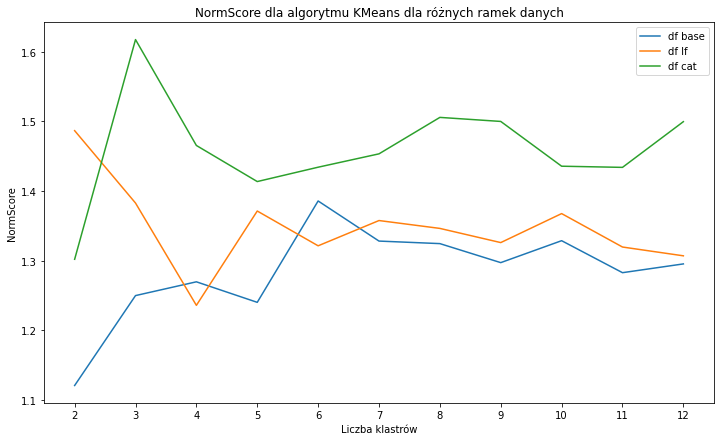

In [355]:
plt.figure(figsize=(12, 7))
plt.plot(ds_res.loc["KMeans"], label = "df base")
plt.plot(ds_lf_res.loc["KMeans"], label = "df lf")
plt.plot(ds_cat_res.loc["KMeans"], label = "df cat")
plt.legend()
plt.xticks(np.arange(2, 13))
plt.title("NormScore dla algorytmu KMeans dla różnych ramek danych")
plt.ylabel("NormScore")
plt.xlabel("Liczba klastrów")
plt.show()

### Wybór ostatecznego modelu

Należy jednak pamiętać, że KMeans jest metodą niedeterministyczną i wynik zależy od początkowego wyboru punktów, w szczególności w przypadku zbioru o tak wielu wymiarach. Dlatego kolejnym krokiem będzie znalezienie takich punktów startowych dla środków klastrów, które umożliwią nam jak najlepszy ("najczystszy") podział na segmenty. 

Poszukamy ich dla każdego zbioru danych. Dla ramki bazowej i z mniejszą ilością kolumn zrobimy to dla liczby klastrów równej 10 (lokalne maksima, największe wartości dla liczby klastrów większej od 6). Natomiast dla ramki z innym kodowaniem zmiennych kategorycznych wybierzemy jako liczbę klastrów 8. 

W tym celu skonstruujemy własną metrykę, która wyraża się wzorem: 
$$N = \displaystyle\frac{\displaystyle\sum_{i \in T(k)}{R_i}}{\displaystyle\sum_{i \in F(k)}{R_i}},$$
gdzie:
- $T(k)$ to klastry o frakcji klientów przynoszących dochód większej niż $k$, 
- $F(k)$ to pozostałe klastry, 
- $R_i$ to frakcja klientów przynoszących dochód z $i$-tego klastra. 

In [164]:
import sympy
random_states = list(sympy.primerange(2, 200))

def choose_best_state(dataset, threshold, n_clusters = 10):
    results = []
    for r_s in random_states:
        model = KMeans(n_clusters = n_clusters, random_state = r_s)
        labels = model.fit_predict(dataset)
        copy = data.copy()
        copy["lab"] = labels
        clusters = copy.groupby("lab")["Revenue"].mean()
        indexes = np.array(clusters) > threshold
        result = sum(clusters * indexes)/sum(clusters * ~indexes) # zaproponowany score
        print(result)
        results.append(result)
    return random_states[results.index(max(results))]

In [68]:
choose_best_state(data_scaled, 0.9)

5.735564143079924
1.079288342198682
5.739782188869945
4.480771745174082
4.478282552881058
1.5762188148398744
4.475465438316265
1.576301958105155
1.5846106008100591
1.5724477874985512
1.375359165877826
1.5585846667241703
1.2224550613068788
4.477926986676359
1.3644568168357267
8.133193527938689
3.2640498238409674
1.3753094122066893
0.9719172765910369
1.5606589761054785
8.396150881133682
1.056231713731746
1.3605109023118116
5.71988169526817
1.3727355426417847
1.5585846667241703
1.1205033163256761
1.0687495687629724
1.3600388500613856
5.742598220516092
8.404326709746998
1.5629282107007731
1.3776410651159094
1.2224241414951107
1.0671876595308325
1.375923649647206
1.3703579922069962
1.576301958105155
1.577693414283045
1.0728108868914517
4.42638711661546
1.5598808730466547
1.37235418695322
1.3649613611063938
4.502012274336352
4.431268285211995


127

In [144]:
choose_best_state(ds_less_features, 0.9)

1.3804865615482256
1.8495991931896598
2.0108130342575037
1.9697342775021967
1.5888736920862023
4.7912214534661715
1.7311750597029192
2.0110407555803267
1.8413875319146022
1.8301844400247909
6.759731054175468
1.7130166259895931
1.4146611879414845
1.6087105827237524
6.560622189808042
2.0387186001779916
1.5889175144412224
1.8671380633801857
1.565372198194752
1.547841732851812
1.8882642198692774
1.830060757501387
2.0232585361389477
1.7024509055651573
1.3784416999636708
1.744795053062555
1.8367851868043419
1.847529443643608
1.8365950731260974
1.5737753803399903
1.9805487378555038
2.0125705516699592
1.9819407017770707
1.496495784539974
5.444691481029242
2.0150531512398286
2.0150531512398286
2.01078276615656
1.8583948988305945
1.530434231372122
1.813385280366598
1.6834213678829966
2.1158732130613584
1.4602334899175466
1.6781553801697975
5.55861402264333


31

In [173]:
#niestety dla większego tresholdu miara daje 0 - dla tego zbioru grupy są mało "czyste"
choose_best_state(scaled_data_cat, 0.6, n_clusters = 8) 

1.08360492565262
1.0832737345428323
1.08360492565262
1.08360492565262
1.0831543522469251
1.0827414420716397
1.0842019862589216
1.0830088417355273
1.084568545462347
1.085790136070324
1.0832737345428323
1.0811135951155695
1.0897036907878412
1.0839092664696883
1.0836049256526201
1.0832737345428323
1.08360492565262
1.08360492565262
1.0822810245269856
1.08360492565262
1.0857716296484805
1.0805743254498599
1.0830177321934402
1.0832737345428323
1.0899888405249722
1.084568545462347
1.0832737345428323
1.08360492565262
1.0831239720357284
1.0838233175397933
1.1012870159267185
1.0828147406604631
1.0823884360055123
1.080533978623916
1.0831061373356352
1.0830522551861093
1.0799319512188652
1.0831543522469251
1.083587197381214
1.0832737345428323
1.0831061373356352
1.0836049256526197
1.0839235713854851
1.0823884360055123
1.0831239720357284
1.08294869099922


127

Teraz sprawdzimy, jak wygląda klasteryzacja dla wskazanych przez funkcję random_state'ów. 

In [28]:
def summary(labels):
    X = data.copy()
    X["lab"] = labels
    sizes = list(X.groupby("lab").size())
    ratios = list(X.groupby("lab")["Revenue"].mean())
    return pd.DataFrame({"size": sizes, "revenue_ratio": ratios})

In [26]:
model_ds = KMeans(n_clusters = 10, random_state = 127)
labels_ds = model_ds.fit_predict(data_scaled)
model_ds_lf = KMeans(n_clusters = 10, random_state = 31)
labels_ds_lf = model_ds_lf.fit_predict(ds_less_features)
model_ds_cat = KMeans(n_clusters = 8, random_state = 127)
labels_ds_cat = model_ds_cat.fit_predict(scaled_data_cat)

In [206]:
summary(labels_ds_lf)

,size,revenue_ratio
0,870,0.025287
1,1422,0.028833
2,1161,0.000861
3,1298,0.996918
4,1315,0.045627
5,812,0.003695
6,422,0.971564
7,2778,0.004320
8,1896,0.000000
9,356,0.182584


In [207]:
summary(labels_ds_cat)

,size,revenue_ratio
0,2894,0.061852
1,783,0.003831
2,982,0.113035
3,1817,0.025867
4,1218,0.320197
5,1471,0.687967
6,853,0.044549
7,2312,0.055363


Algorytm KMeans dał nam podobne rezultaty dla dwóch pierwszych ramek, jednak to w pierwszym przypadku osiągnęliśmy nieco lepszy wynik - klastry klientów przynoszących dochód są bardziej jednorodne i nie ma klastra mieszanego jak w drugiej wersji (~18% przynoszących dochód).

Dlatego wybieramy pierwszy model, tj. KMeans dla 10 klastrów z random_state = 127 działający na pierwszej ramce danych (bez odrzuconych kolumn i innego kodowania zmiennych kategorycznych). 

### Wizualizacja wyniku

In [208]:
from sklearn.manifold import TSNE
tSNE = TSNE(learning_rate = 400, random_state = 42, verbose = 1)

In [209]:
proj_tSNE_ds = tSNE.fit_transform(data_scaled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12330 samples in 0.002s...
[t-SNE] Computed neighbors for 12330 samples in 7.592s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12330
[t-SNE] Computed conditional probabilities for sample 2000 / 12330
[t-SNE] Computed conditional probabilities for sample 3000 / 12330
[t-SNE] Computed conditional probabilities for sample 4000 / 12330
[t-SNE] Computed conditional probabilities for sample 5000 / 12330
[t-SNE] Computed conditional probabilities for sample 6000 / 12330
[t-SNE] Computed conditional probabilities for sample 7000 / 12330
[t-SNE] Computed conditional probabilities for sample 8000 / 12330
[t-SNE] Computed conditional probabilities for sample 9000 / 12330
[t-SNE] Computed conditional probabilities for sample 10000 / 12330
[t-SNE] Computed conditional probabilities for sample 11000 / 12330
[t-SNE] Computed conditional probabilities for sample 12000 / 12330
[t-SNE] Computed conditional probabilities for sam

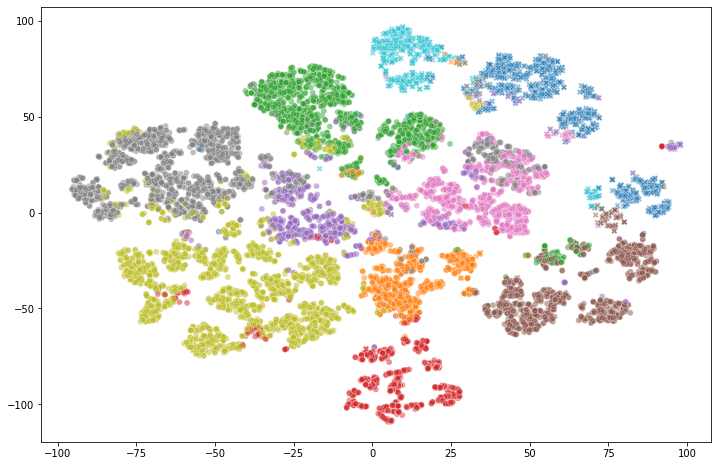

In [231]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = proj_tSNE_ds[:,0],
                y = proj_tSNE_ds[:,1], 
                hue = labels_ds,
                style = data_scaled["Revenue"],
                alpha=0.5,
                palette=plt.get_cmap("tab10"), 
                legend=False)
plt.show()

# Kolorem zostały oznaczone różne klastry, kształt odpowiada wartości zmiennej Revenue

### Przykładowa analiza różnic między grupami klientów nieprzynoszących dochodu

In [248]:
final_data = data.copy()
final_data["cluster"] = labels_ds

In [272]:
non_rev_clusters = final_data[~final_data["cluster"].isin([0, 9])]

In [273]:
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
                'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                'BounceRates', 'ExitRates', 'PageValues']

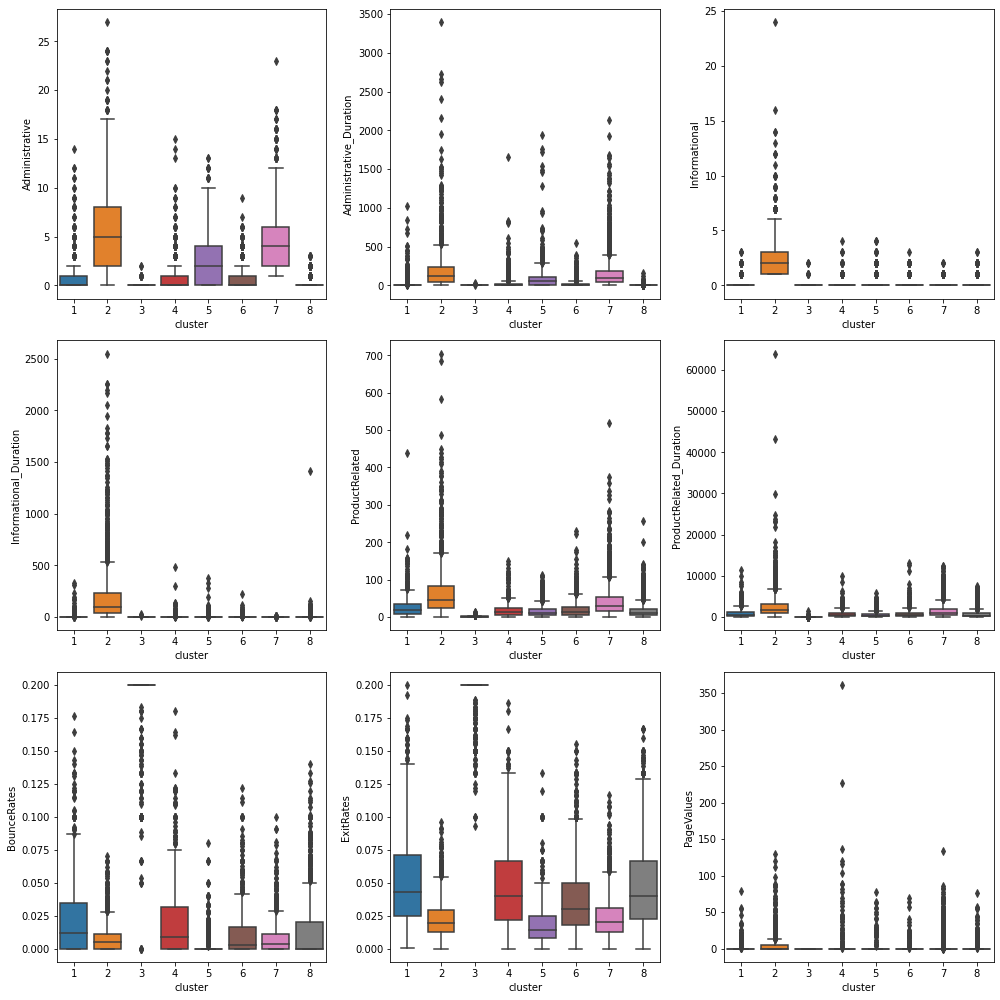

In [275]:
fig, ax = plt.subplots(3, 3, figsize=(14, 14))
for i, feature in enumerate(numeric_features):
    m, n = divmod(i, 3)
    sns.boxplot(x="cluster", y=feature, data=non_rev_clusters, ax = ax[m, n])
plt.tight_layout()
plt.show()

Nawet z prostej analizy histogramów zmiennych numerycznych mamy informację, że klienci zakwalifikowani do klastra numer 2 spędzają dużo czasu na wszystkich stronach (długie sesje). Jednak wyraźną różnicę widać w czasie spędzonym na stronach o charakterze informacyjnym. W takim wypadku warto kierować do nich reklamy właśnie na takich stronach, w komunikacji odnosić się do faktów etc. 

Widzimy też, że klienci z klastra numer 7 spędzają więcej czasu na stronach związanych z produktem - być może byliby oni bardziej skłonni do zakupu, gdyby zaoferować im odpowiednią, nawet niewielką promocję. 

Klienci z klastrów 1, 4, 8 widocznie często odwiedzają strony o wyższych wartościach BounceRate i ExitRate, zatem może warto zaoferować im specjalne oferty właśnie na nich. 

Różne zależności możemy też znaleźć, patrząc na zmienne kategoryczne. 

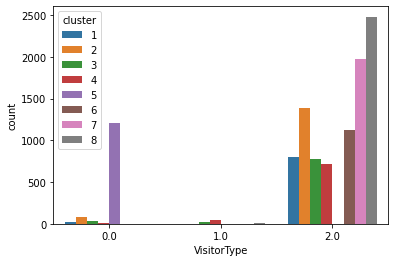

[array(['New_Visitor', 'Other', 'Returning_Visitor'], dtype=object)]

In [285]:
sns.countplot(x="VisitorType", hue="cluster", data=non_rev_clusters)
plt.show()
ordinal_encoder.categories_

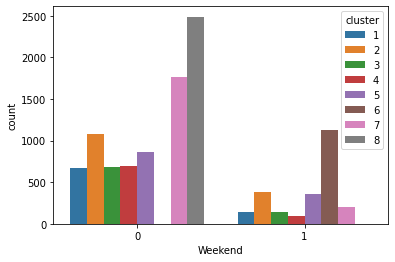

In [298]:
sns.countplot(x="Weekend", hue="cluster", data=non_rev_clusters)
plt.show()

Okazuje się, że grupa piąta to nowi klienci - ich na pewno trzeba zachęcić do założenie konta w serwisie, np. poprzez związane z tym promocje. Grupa szósta to z kolei użytkownicy weekendowi - dla nich też można przewidzieć odpowiednie targetowanie komunikatów. 

Oczywiście są to tylko jednowymiarowe analizy, a klasteryzacja pozwala nam na znalezienie wielowymiarowych zależności odróżniających grupy od siebie, ale jest to już przedmiotem innego zadania. 

## Podsumowanie
W ramach projektu nr 2, udało nam się, zaczynając od surowych, rzeczywistych danych, zbudować szereg modeli i porównując, wybrać ten, który według przyjętych metryk spisuje się najlepiej. Korzystaliśmy z gotowych metryk, ale stworzyliśmy też swoje podejście do problemu, swoje metryki i własny sposób wyboru ostatecznego z nich. Realizowaliśmy zarówno klasteryzację klasyfikacyjną, jak i właściwą (nazwaną przez nas "biznesową").

Wnioskujemy jednak, że to nie sam rezultat czy liczbowa reprezentacja jego skuteczności jest w tym miejscu najważniejsza. Problem przede wszystkim uświadamia nas, że złożoność prawdziwych procesów społecznych i natury człowieka prowadzi do ogromnych trudności w "szufladkowaniu" metodami klastrowania. Ludzie i ich zachowania przenikają się, a proste podziały na "bardziej" i "mniej" chętnych do realizacji transakcji internetowej są niemożliwe (lub bardzo trudne). Jesteśmy przekonani, że doświadczenia wyniesione z powyższej pracy, przydadzą się nam na dalszej ścieżce kariery.